# Tokens Budget for final DQ experiments

Para cada dataset
- Extrair dados
- aplicar construçao das prompts
- tokenizer
- stats com os tamanhos

- funções de extract dos datasets
- funções de prompt preds?
    não, pq a prompt pode variar
- começar com as de nli



In [1]:
import os
# set available gpu's
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

from evo_functions import extract_SemEval_data, extract_ContractNLI_data, extract_MEDIQASUM_data, extract_LegalSumTOSDR_data, load_model
import numpy as np

/cfs/home/u023967/miniconda3/envs/thesis_env_2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [2]:
import random

In [3]:
import json

# function to save data in the format 
def save_data2file(data, folder, file_name):
    file_name += '.json'
    save_path = os.path.join(folder, file_name)
    with open(save_path, 'w') as file:
        json.dump(data, file)
    print(f"Data saved to {save_path}")

In [4]:
model, tokenizer = load_model(checkpoint="microsoft/Phi-3-mini-4k-instruct")

Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]


Phi-3 selecionado


## SemEval

300 instances

In [4]:
val_semeval_data = extract_SemEval_data()
train_semeval_data = extract_SemEval_data(type='train')

Used data with already retrieved examples from DATASETS/SemEval_data/dev_w_retrieved.json
Used data with already retrieved examples from DATASETS/SemEval_data/train_w_retrieved.json


In [6]:
print(f"len(val_semeval_data)-->{len(val_semeval_data)}")
print(f"len(train_semeval_data)-->{len(train_semeval_data)}")

len(val_semeval_data)-->200
len(train_semeval_data)-->1700


In [10]:
full_semeval_data = val_semeval_data + train_semeval_data

In [17]:
val_tokens_semeval = []

for ins in val_semeval_data:

    ins_text = "\n".join(ins['primary_evidence'])
    if 'secondary_evidence' in ins:
        ins_text += '\n'
        ins_text += "\n".join(ins['secondary_evidence'])
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)

    val_tokens_semeval.append(int(len(ins_tokenized['input_ids'][0])))

In [18]:
train_tokens_semeval = []

for ins in train_semeval_data:

    ins_text = "\n".join(ins['primary_evidence'])
    if 'secondary_evidence' in ins:
        ins_text += '\n'
        ins_text += "\n".join(ins['secondary_evidence'])
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)

    train_tokens_semeval.append(int(len(ins_tokenized['input_ids'][0])))

In [22]:

train_tokens_semeval = np.array(train_tokens_semeval)
val_tokens_semeval = np.array(val_tokens_semeval)
total_tokens_semeval = np.concatenate((train_tokens_semeval, val_tokens_semeval))

sum_total_tokens_semeval = np.sum(total_tokens_semeval)
sum_train_tokens_semeval = np.sum(train_tokens_semeval)
sum_val_tokens_semeval = np.sum(val_tokens_semeval)

print(f"sum_total_tokens_semeval-->{sum_total_tokens_semeval}")
print(f"sum_train_tokens_semeval-->{sum_train_tokens_semeval}")
print(f"sum_val_tokens_semeval-->{sum_val_tokens_semeval}\n")

print(f"np.avg(total_tokens_semeval)-->{np.average(total_tokens_semeval)}\n")

print(f"sum_total_tokens_semeval*0.15-->{sum_total_tokens_semeval*0.15}")

sum_total_tokens_semeval-->1030102
sum_train_tokens_semeval-->930332
sum_val_tokens_semeval-->99770

np.avg(total_tokens_semeval)-->542.1589473684211

sum_total_tokens_semeval*0.15-->154515.3


In [24]:
(154515.3 - 99770)/542.1589473684211

100.97647611595742

In [25]:
train_semeval_data[0].keys()

dict_keys(['id', 'statement', 'primary_evidence', 'label', 'secondary_evidence', 'retrieved_primary_sentence', 'retrieved_secondary_sentence'])

In [31]:
import random

In [76]:
group_E = [item for item in train_semeval_data if item['label'] == 'Entailment']
group_C = [item for item in train_semeval_data if item['label'] == 'Contradiction']

# Set the seed for reproducibility
random.seed(33)

# Calculate half the sample size
n = 100
half_n = n // 2

# Randomly select half the elements from each group
selected_E = random.sample(group_E, half_n)
selected_C = random.sample(group_C, half_n)

semeval_15percent_random = val_semeval_data + selected_E + selected_C
len(semeval_15percent_random)

300

In [77]:
save_data2file(semeval_15percent_random, folder='DATASETS/15percent_random', file_name='semeval')

Examples with retreival svaed to DATASETS/15percent_random/semeval.json


In [70]:
for i, j in enumerate([100,200,300]):
    print(i,j)

0 100
1 200
2 300


In [72]:
for i, ex_1 in enumerate(val_semeval_data):
    for j, ex_2 in enumerate(val_semeval_data):
        if i != j and ex_1 == ex_2:
            print(i, j)
            print(ex_1)
            print(f"\n\n\n\n")
            print(ex_2)

## Contract NLI

707 instances

In [10]:
val_contractnli_data = extract_ContractNLI_data()
train_contractnli_data = extract_ContractNLI_data(type='train')

full_contractnli_data = train_contractnli_data + val_contractnli_data

LOADE
Used data with already retrieved examples from DATASETS/ContractNLI_data/dev_w_retrieved_task_w_2_labels_False.json
filtering out the NotMentioned examples...
Counter({'Entailment': 519, 'Contradiction': 95})
LOADE
Used data with already retrieved examples from DATASETS/ContractNLI_data/train_w_retrieved_task_w_2_labels_False.json
filtering out the NotMentioned examples...
Counter({'Entailment': 3530, 'Contradiction': 841})


In [11]:
val_contractnli_data[0].keys()

dict_keys(['text', 'statement', 'label', 'spans', 'spans_index', 'retrieved_sentences'])

In [12]:
val_no_tokens_contractnli = []

for ins in val_contractnli_data:
    ins_text = ins['text'] + '\n' + ins['statement'] + "\n".join(ins['retrieved_sentences'])
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    val_no_tokens_contractnli.append(int(len(ins_tokenized['input_ids'][0])))

train_no_tokens_contractnli = []

for ins in train_contractnli_data:
    ins_text = ins['text'] + '\n' + ins['statement'] + "\n".join(ins['retrieved_sentences'])
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    train_no_tokens_contractnli.append(int(len(ins_tokenized['input_ids'][0]))) 

full_no_tokens_contractnli = []

for ins in full_contractnli_data:
    ins_text = ins['text'] + '\n' + ins['statement'] + "\n".join(ins['retrieved_sentences'])
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    full_no_tokens_contractnli.append(int(len(ins_tokenized['input_ids'][0])))

In [19]:
val_no_tokens_contractnli = np.array(val_no_tokens_contractnli)
train_no_tokens_contractnli = np.array(train_no_tokens_contractnli)
full_no_tokens_contractnli = np.array(full_no_tokens_contractnli)

sum_val_no_tokens_contractnli = np.sum(val_no_tokens_contractnli)
sum_train_no_tokens_contractnli = np.sum(train_no_tokens_contractnli)
sum_full_no_tokens_contractnli = np.sum(full_no_tokens_contractnli)

avg_train_no_tokens_contractnli = np.average(train_no_tokens_contractnli)


print(f"val sum-->{sum_val_no_tokens_contractnli}")
print(f"train sum-->{sum_train_no_tokens_contractnli}")
print(f"full sum-->{sum_full_no_tokens_contractnli}\n")
print(f"train avg-->{avg_train_no_tokens_contractnli}")

val sum-->1960916
train sum-->12969620
full sum-->14930536

train avg-->2967.1974376572866


In [20]:
(0.15-sum_val_no_tokens_contractnli/sum_full_no_tokens_contractnli)*sum_full_no_tokens_contractnli/avg_train_no_tokens_contractnli

93.91501774146043

In [21]:
0.15*sum_full_no_tokens_contractnli

2239580.4

In [22]:
sum_val_no_tokens_contractnli + 94*avg_train_no_tokens_contractnli

2239832.559139785

- Adicionar 94 exemplos mantendo o rácio og

In [26]:
len(val_contractnli_data)

614

In [25]:
group_E = [item for item in train_contractnli_data if item['label'] == 'Entailment']
group_C = [item for item in train_contractnli_data if item['label'] == 'Contradiction']

# Set the seed for reproducibility
random.seed(33)

# Calculate half the sample size
n = 94
E_n = int(519/(519+95)*n)
C_n = int(95/(519+95)*n)

# Randomly select half the elements from each group
selected_E = random.sample(group_E, E_n)
selected_C = random.sample(group_C, C_n)

contractnli_15percent_random = val_contractnli_data + selected_E + selected_C
len(contractnli_15percent_random)

707

In [27]:
save_data2file(contractnli_15percent_random, folder='DATASETS/15percent_random', file_name='contractnli')

Data saved to DATASETS/15percent_random/contractnli.json


## MEDIQA

In [5]:
val_mediqa_data = extract_MEDIQASUM_data()
train_mediqa_data = extract_MEDIQASUM_data(type='train')

full_mediqa_data = train_mediqa_data + val_mediqa_data

Used data with already retrieved examples from DATASETS/MEDIQASUM_data/valid_w_retrieved.json
Used data with already retrieved examples from DATASETS/MEDIQASUM_data/train_w_retrieved.json


In [6]:
train_mediqa_data[0]

{'dataset': 'virtassist',
 'encounter_id': 'D2N001',
 'dialogue': "[doctor] hi , martha . how are you ?\n[patient] i'm doing okay . how are you ?\n[doctor] i'm doing okay . so , i know the nurse told you about dax . i'd like to tell dax a little bit about you , okay ?\n[patient] okay .\n[doctor] martha is a 50-year-old female with a past medical history significant for congestive heart failure , depression and hypertension who presents for her annual exam . so , martha , it's been a year since i've seen you . how are you doing ?\n[patient] i'm doing well . i've been traveling a lot recently since things have , have gotten a bit lighter . and i got my , my vaccine , so i feel safer about traveling . i've been doing a lot of hiking . uh , went to washington last weekend to hike in northern cascades, like around the mount baker area .\n[doctor] nice . that's great . i'm glad to hear that you're staying active , you know . i , i just love this weather . i'm so happy the summer is over . i'

In [7]:
full_mediqa_data[0].keys()

dict_keys(['dataset', 'encounter_id', 'dialogue', 'note', 'retrieved_example_note'])

In [8]:
val_no_tokens_mediqa = []
train_no_tokens_mediqa = []
full_no_tokens_mediqa = []

no_tokens_note = []

for ins in val_mediqa_data:

    ins_text = ins['dialogue'] + '\n' + ins['retrieved_example_note']
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    val_no_tokens_mediqa.append(int(len(ins_tokenized['input_ids'][0])))

    note_tokenized = tokenizer(ins['note'], return_tensors="pt", return_attention_mask=False)
    no_tokens_note.append(int(len(note_tokenized['input_ids'][0])))

for ins in train_mediqa_data:

    ins_text = ins['dialogue'] + '\n' + ins['retrieved_example_note']
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    train_no_tokens_mediqa.append(int(len(ins_tokenized['input_ids'][0])))

    note_tokenized = tokenizer(ins['note'], return_tensors="pt", return_attention_mask=False)
    no_tokens_note.append(int(len(note_tokenized['input_ids'][0])))

for ins in full_mediqa_data:

    ins_text = ins['dialogue'] + '\n' + ins['retrieved_example_note']
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    full_no_tokens_mediqa.append(int(len(ins_tokenized['input_ids'][0])))

    note_tokenized = tokenizer(ins['note'], return_tensors="pt", return_attention_mask=False)
    no_tokens_note.append(int(len(note_tokenized['input_ids'][0])))

In [9]:
val_no_tokens_mediqa = np.array(val_no_tokens_mediqa)
train_no_tokens_mediqa = np.array(train_no_tokens_mediqa)
full_no_tokens_mediqa = np.array(full_no_tokens_mediqa)

sum_val_no_tokens_mediqa = np.sum(val_no_tokens_mediqa)
sum_train_no_tokens_mediqa = np.sum(train_no_tokens_mediqa)
sum_full_no_tokens_mediqa = np.sum(full_no_tokens_mediqa)

avg_train_no_tokens_mediqa = np.average(train_no_tokens_mediqa)


print(f"val sum-->{sum_val_no_tokens_mediqa}")
print(f"train sum-->{sum_train_no_tokens_mediqa}")
print(f"full sum-->{sum_full_no_tokens_mediqa}\n")
print(f"train avg-->{avg_train_no_tokens_mediqa}")

val sum-->49151
train sum-->175936
full sum-->225087

train avg-->2625.910447761194


In [10]:
len(val_mediqa_data)

20

In [11]:
len(train_mediqa_data)

67

In [12]:
(0.15*sum_full_no_tokens_mediqa - sum_val_no_tokens_mediqa)/avg_train_no_tokens_mediqa

-5.860043709076029

In [15]:
# Set the seed for reproducibility
random.seed(33)

mediqa_15percent_random = random.sample(val_mediqa_data, 15)
len(mediqa_15percent_random)

15

In [16]:
save_data2file(mediqa_15percent_random, folder='DATASETS/15percent_random', file_name='mediqasum')

Data saved to DATASETS/15percent_random/mediqasum.json


In [17]:
mediqa_data_dq = extract_MEDIQASUM_data(use_data_sorted_by_dq=True)

Used data with already retrieved examples from DATASETS/DATA_QUALITY/MEDIQASUM_data_quality.json


In [22]:
print(mediqa_data_dq[0]['score'])
print(mediqa_data_dq[50]['score'])

0.9849911332130432
0.9536188244819641


In [19]:
mediqa_data_dq[0].keys()

dict_keys(['dataset', 'encounter_id', 'dialogue', 'note', 'retrieved_example_note', 'set', 'score'])

In [23]:
mediqa_15percent_rev_dq = mediqa_data_dq[-15:]

In [24]:
len(mediqa_15percent_rev_dq)

15

In [25]:
mediqa_15percent_rev_dq[0]['score']

0.9414290189743042

In [26]:
save_data2file(mediqa_15percent_rev_dq, folder="DATASETS/15percent_rev_dq", file_name='mediqasum')

Data saved to DATASETS/15percent_rev_dq/mediqasum.json


In [13]:
no_tokens_note = np.array(no_tokens_note)

print(f"Note sizes")
print(f"mean-->{np.mean(no_tokens_note)}")
print(f"75th percentile-->{np.percentile(no_tokens_note, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_note, 75)}")
print(f"max-->{np.max(no_tokens_note)}")

print(f"sum-->{np.sum(no_tokens_note)}")

Note sizes
mean-->771.5977011494252
75th percentile-->631.75
25th percentile-->934.5
max-->1511
sum-->134258


## Legal SUM

In [5]:
legalsum_data = extract_LegalSumTOSDR_data()

Used data with already retrieved examples from DATASETS/LegalSumTOSDR_data/train_w_retrieved.json


In [6]:
legalsum_data[0].keys()

dict_keys(['original_text', 'reference_summary', 'uid', 'retrieved_example_summary'])

In [7]:
legalsum_data[0]

{'original_text': 'search encrypt uses cookies to determine the effectiveness of our own marketing campaigns. because we don t track any personally identifiable information we can t do more than determine that a specific user searched for whatever search terms they searched for. we know nothing about that particular user and we don t know anything identifiable about the user. using cookies also allows us to encrypt your search queries on the browser to help hide the history of what you searched for on the machine.',
 'reference_summary': 'this service requires first party cookies which are cookies that only belong to the domain of the service and not a third party.',
 'uid': 'tosdr112',
 'retrieved_example_summary': 'this service does not track you.'}

In [8]:
no_tokens_legalsum = []
target_no_tokens = []

for ins in legalsum_data:

    ins_text = ins['original_text']
    ins_tokenized = tokenizer(ins_text, return_tensors="pt", return_attention_mask=False)
    no_tokens_legalsum.append(int(len(ins_tokenized['input_ids'][0])))

    target_tokenized = tokenizer(ins['reference_summary'], return_tensors="pt", return_attention_mask=False)
    target_no_tokens.append(int(len(target_tokenized['input_ids'][0])))

In [9]:
no_tokens_legalsum = np.array(no_tokens_legalsum)

sum_tokens_legalsum = np.sum(no_tokens_legalsum)
avg_no_tokens_legalsum = np.average(no_tokens_legalsum)

print(f"avg-->{avg_no_tokens_legalsum}")
print(f"sum-->{sum_tokens_legalsum}")

avg-->124.45505617977528
sum-->44306


In [10]:
len(legalsum_data)

356

In [25]:
(0.15*(sum_tokens_legalsum+100*356))/(avg_no_tokens_legalsum+100)

53.4

In [13]:
no_to_15 = 54

In [14]:
# Set the seed for reproducibility
random.seed(33)

legalsum_15percent_random = random.sample(legalsum_data, no_to_15)
len(legalsum_15percent_random)

54

In [15]:
save_data2file(legalsum_15percent_random, folder='DATASETS/15percent_random', file_name='legalsum')

Data saved to DATASETS/15percent_random/legalsum.json


In [16]:
legalsum_data_dq = extract_LegalSumTOSDR_data(use_data_sorted_by_dq=True)

Used data with already retrieved examples from DATASETS/DATA_QUALITY/LegalSumTOSDR_data_quality.json


In [18]:
print(legalsum_data_dq[0]['score'])
print(legalsum_data_dq[50]['score'])
print(legalsum_data_dq[-1]['score'])

0.9826619625091553
0.9360153675079346
0.003978084772825241


In [19]:
legalsum_data_dq[0].keys()

dict_keys(['original_text', 'reference_summary', 'uid', 'retrieved_example_summary', 'set', 'score'])

In [20]:
legalsum_15percent_rev_dq = legalsum_data_dq[-no_to_15:]

In [21]:
len(legalsum_15percent_rev_dq)

54

In [23]:
legalsum_15percent_rev_dq[-1]['score']

0.003978084772825241

In [24]:
save_data2file(legalsum_15percent_rev_dq, folder="DATASETS/15percent_rev_dq", file_name='legalsum')

Data saved to DATASETS/15percent_rev_dq/legalsum.json


In [38]:
target_no_tokens = np.array(target_no_tokens)

print(f"target no. of tokens")
print(f"mean-->{np.mean(target_no_tokens)}")
print(f"75th percentile-->{np.percentile(target_no_tokens, 25)}")
print(f"25th percentile-->{np.percentile(target_no_tokens, 75)}")
print(f"max-->{np.max(target_no_tokens)}")
print(f"sum-->{np.sum(target_no_tokens)}")

target no. of tokens
mean-->17.068493150684933
75th percentile-->10.0
25th percentile-->19.0
max-->61
sum-->1246


## Compiled

In [35]:
print(f"SemEval\n")
print(f"mean-->{np.mean(no_tokens_semeval)}")
print(f"75th percentile-->{np.percentile(no_tokens_semeval, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_semeval, 75)}")
print(f"sum-->{np.sum(no_tokens_semeval)}")

print(f"\n")

print(f"Contract NLI\n")
print(f"mean-->{np.mean(no_tokens_contractnli)}")
print(f"75th percentile-->{np.percentile(no_tokens_contractnli, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_contractnli, 75)}")
print(f"sum-->{np.sum(no_tokens_contractnli)}")

print(f"\n")

print(f"MEDIQA\n")
print(f"mean-->{np.mean(no_tokens_mediqa)}")
print(f"75th percentile-->{np.percentile(no_tokens_mediqa, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_mediqa, 75)}")
print(f"sum-->{np.sum(no_tokens_mediqa)}")

print(f"\n")

print(f"Legalsum\n")
print(f"mean-->{np.mean(no_tokens_legalsum)}")
print(f"75th percentile-->{np.percentile(no_tokens_legalsum, 25)}")
print(f"25th percentile-->{np.percentile(no_tokens_legalsum, 75)}")
print(f"sum-->{np.sum(no_tokens_legalsum)}")

SemEval

mean-->498.85
75th percentile-->211.5
25th percentile-->694.75
sum-->99770


Contract NLI

mean-->3193.674267100977
75th percentile-->1846.25
25th percentile-->3742.5
sum-->1960916


MEDIQA

mean-->2474.05
75th percentile-->2200.5
25th percentile-->2989.75
sum-->49481


Legalsum

mean-->85.04109589041096
75th percentile-->36.0
25th percentile-->104.0
sum-->6208


# Stats

In [36]:
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(no_tokens)

# Add labels and title
plt.title("Box Plot of Array Lengths")
plt.ylabel("Value")

# Display the plot
plt.show()


NameError: name 'no_tokens' is not defined

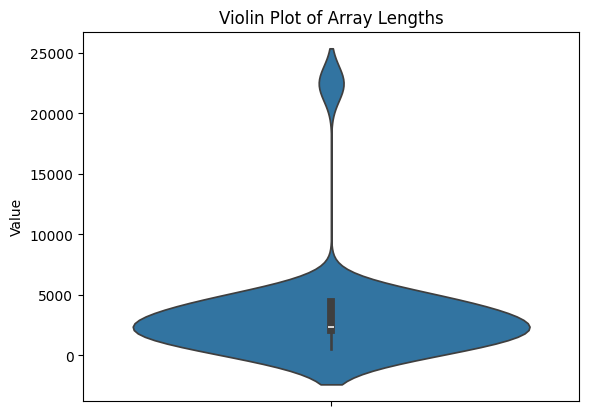

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(data=no_tokens)

# Add labels and title
plt.title("Violin Plot of Array Lengths")
plt.ylabel("Value")

# Display the plot
plt.show()


# Datasets Stats for thesis

In [ ]:
val_semeval_data = extract_SemEval_data()
val_contractnli_data = extract_ContractNLI_data()
val_mediqasum_data = extract_MEDIQASUM_data()
val_legalsum_data = extract_LegalSumTOSDR_data()

test_semeval_data = extract_SemEval_data(type='test')
test_contractnli_data = extract_ContractNLI_data(type='test')
test_mediqasum_data = extract_MEDIQASUM_data(type='test')
test_legalsum_data = extract_LegalSumTOSDR_data(type='test')